# Importar bibliotecas

In [1]:
import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Importando dados

In [2]:
dataset = pd.read_csv("bcdados03.csv")
dataset = dataset.dropna()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Separando dados de teste dos dados de treino

In [3]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 1/5, random_state = 0)

# dimensionamento de recursos

In [4]:
sc_X_train = StandardScaler()
sc_X_test = StandardScaler()
 
X_train = sc_X_train.fit_transform(X_train)
X_test = sc_X_test.fit_transform(X_test)

# Treinando Modelo

In [5]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
print(classifier.predict([[0.715, 95, 23, 91, 83, 97]]))

[2]


# Previsão

In [6]:
y_pred = classifier.predict(X_test)
y_result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

# matriz de confusão

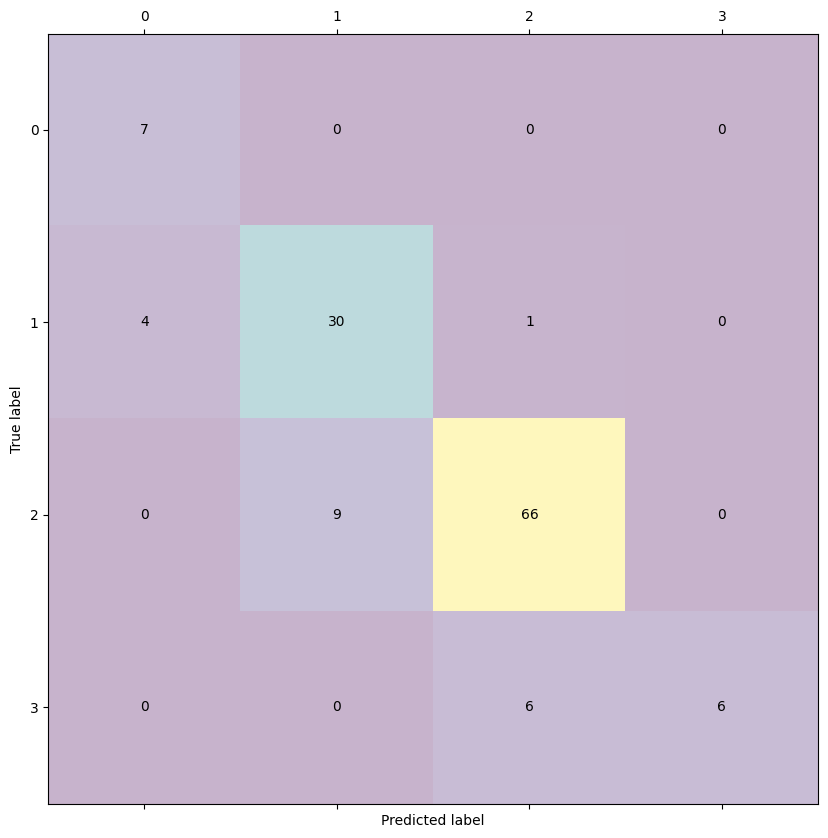

In [7]:
cm = confusion_matrix(y_test, y_pred)
# Make a grafic of the confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(cm, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]): # Change the color of the text according to the background
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
# Save the figure to a .png file 
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()